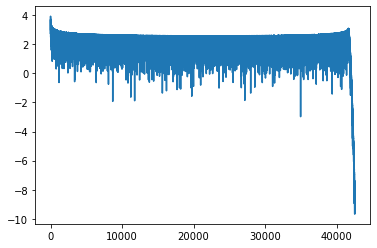

In [69]:
import numpy as np
import matplotlib.pyplot as plt

#在-1到1之間取 N 個 Chebyshev points 和對應的值
N=42558
x=np.cos((np.linspace(0,N,N+1)*np.pi)/N)
f=np.sin(np.exp(10*x))

#Barycentric_interpolation
def Barycentric_interpolation(x0,x,f,N):
    frac=0
    deno=0
    for j in range(1,N):
        frac=frac+((-1)**j*f[j])/(x0-x[j])
        deno=deno+((-1)**j)/(x0-x[j])
    
    frac=frac+0.5*(((-1)**0*f[0])/(x0-x[0]))+0.5*(((-1)**(N)*f[N])/(x0-x[N]))
    deno=deno+0.5*(((-1)**0)/(x0-x[0]))+0.5*(((-1)**(N))/(x0-x[N]))
    return frac/deno                                        

a=f.tolist()[1:N+1]
a.reverse()
A=f.tolist()+a
f_extend=np.array(A)

f_hat=np.real(np.fft.fft(f_extend))

a =np.zeros(N+1);
a[0]= f_hat[0];
a[1:N] = 2*f_hat[1:N];
a[N] = f_hat[N];

plt.plot(np.log10(abs(a)))
plt.savefig('the number of coefficient.png')

In [70]:
np.where(np.log10(abs(a))==min(np.log10(abs(a))))

(array([42526], dtype=int64),)

In [71]:
np.log10(abs(a))[np.where(np.log10(abs(a))==min(np.log10(abs(a))))[0]]

array([-9.6595385])

In [74]:
import random
import time

P=[]
for i in range(1000):
    P.append(random.uniform(-1, 1))
P=np.array(P)
P.sort()

tStart = time.time()

Res_num=[]
for i in range(len(P)):
    Res_num.append(Barycentric_interpolation(P[i],x,f,N))
Res_num=np.array(Res_num)

tEnd = time.time()
print ("p(x) cost %f sec" % (tEnd - tStart))
print (tEnd - tStart)

tStart = time.time()

Res_true=[]
for i in range(len(P)):
    Res_true.append(np.sin(np.exp(10*P[i])))
Res_true=np.array(Res_true)

tEnd = time.time()
print ("g(x) cost %f sec" % (tEnd - tStart))
print (tEnd - tStart)

p(x) cost 114.250580 sec
114.25058007240295
g(x) cost 0.003989 sec
0.003989458084106445


In [75]:
#Res_true

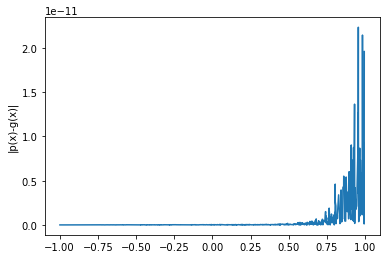

In [76]:
import matplotlib.pyplot as plt
plt.plot(P,abs(Res_true-Res_num))
plt.ylabel('|p(x)-g(x)|')
plt.savefig('P-g.png')

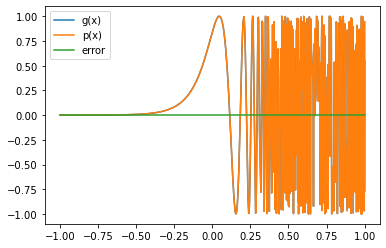

In [54]:
plt.plot(P,Res_true,label='g(x)')
plt.plot(P,Res_num,label='p(x)')
plt.plot(P,Res_true-Res_num,label='error')
plt.legend()
plt.savefig('result.png')

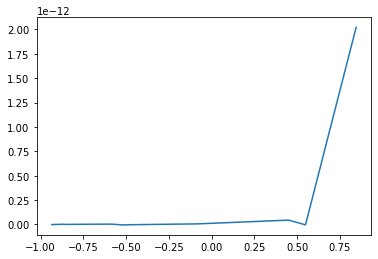

In [43]:
plt.plot(P,Res_true-Res_num)

In [44]:
#x_uniform=np.linspace(-1,1,N+1)
#g=np.sin(np.exp(10*x_uniform))
#plt.plot(x,f)
#plt.plot(x_uniform,g)